In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt

from utils import gaussian_profile, z_statistic, s_statistic, performance_sims, roc_curves

In [2]:
save_figs = True
sess_name_a = 'sims_<N_a>'
sess_name_b = 'sims_<N_a>'
sess_name_c = 'sims_<N_c>'

In [3]:
# Parameters
sess_name_a = "sims_4"
sess_name_b = "sims_5"
sess_name_c = "sims_6"


In [4]:
sess_names = [sess_name_a, sess_name_b, sess_name_c]

z_tpr = [None]*len(sess_names)
z_fpr = [None]*len(sess_names)
s_tpr = [None]*len(sess_names)
s_fpr = [None]*len(sess_names)

for i, sess_name in enumerate(sess_names):

    with open('%s.json' % sess_name) as f:
        param_dict = json.load(f)
    globals().update(param_dict)
    
    np.random.seed(seed)
    q = np.array([n/2, n/2])
    x0_r, y0_r = (q + np.array(Delta))
    x0_n, y0_n = (q - np.array(Delta))
    P_r = gaussian_profile(n/2, n/2, [n, n], cxx_r, cyy_r, cth_r)
    P_n = gaussian_profile(n/2, n/2, [n, n], cxx_n, cyy_n, cth_n)
    T_P_r = alpha_r * gaussian_profile(x0_r, y0_r, [n, n], cxx_r, cyy_r, cth_r)
    T_P_n = alpha_n * gaussian_profile(x0_n, y0_n, [n, n], cxx_n, cyy_n, cth_n)
    
    z_pos, z_neg, s_pos, s_neg = performance_sims(P_r, P_n, T_P_r, T_P_n, sig_r, sig_n, k)
    z_tpr[i], z_fpr[i], s_tpr[i], s_fpr[i] = roc_curves(z_pos, z_neg, s_pos, s_neg)

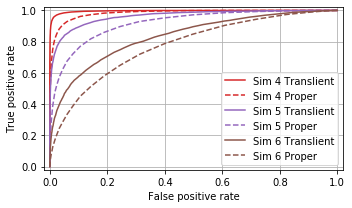

In [5]:
plt.figure(figsize=(5,3))

colors = ['C%d' % (int(s[-1])-1) for s in sess_names]
for i, sess_name in enumerate(sess_names):
    plt.plot(z_fpr[i], z_tpr[i], '-', label='Sim %s Translient' % sess_name[-1], color=colors[i])
    plt.plot(s_fpr[i], s_tpr[i], '--', label='Sim %s Proper' % sess_name[-1], color=colors[i])
    
plt.grid('on')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.xlim(-0.02, 1.02);
plt.ylim(-0.02, 1.02);
plt.legend(loc="lower right")

plt.tight_layout()

if save_figs:
    plt.savefig('figures/roc_sims_%s_%s_%s.pdf' % (sess_name_a[-1], sess_name_b[-1], sess_name_c[-1]))